In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv("churn.csv")
df.head()

,Customer ID,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,Country,State,...,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Satisfaction Score,Customer Status,Churn Label,Churn Score,CLTV,Churn Category,Churn Reason
0,8779-QRDMV,Male,78,No,Yes,No,No,0,United States,California,...,20,0.00,59.65,3,Churned,Yes,91,5433,Competitor,Competitor offered more data
1,7495-OOKFY,Female,74,No,Yes,Yes,Yes,1,United States,California,...,0,390.80,1024.10,3,Churned,Yes,69,5302,Competitor,Competitor made better offer
2,1658-BYGOY,Male,71,No,Yes,No,Yes,3,United States,California,...,0,203.94,1910.88,2,Churned,Yes,81,3179,Competitor,Competitor made better offer
3,4598-XLKNJ,Female,78,No,Yes,Yes,Yes,1,United States,California,...,0,494.00,2995.07,2,Churned,Yes,88,5337,Dissatisfaction,Limited range of services
4,4846-WHAFZ,Female,80,No,Yes,Yes,Yes,1,United States,California,...,0,234.21,3102.36,2,Churned,Yes,67,2793,Price,Extra data charges


In [ ]:
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

In [ ]:
df['Churn'] = df['Churn Label'].map({'Yes': 1, 'No': 0})


In [ ]:
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
drop_cols = [
    'Customer ID',
    'Churn Label',
    'Customer Status',
    'Churn Score',
    'Churn Category',
    'Churn Reason'
]

df.drop(columns=drop_cols, inplace=True)


In [ ]:
df.shape
df.columns


Index(['Gender', 'Age', 'Under 30', 'Senior Citizen', 'Married', 'Dependents',
       'Number of Dependents', 'Country', 'State', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Population', 'Quarter', 'Referred a Friend',
       'Number of Referrals', 'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Satisfaction Score', 'CLTV', 'Churn'],
      dtype='object')

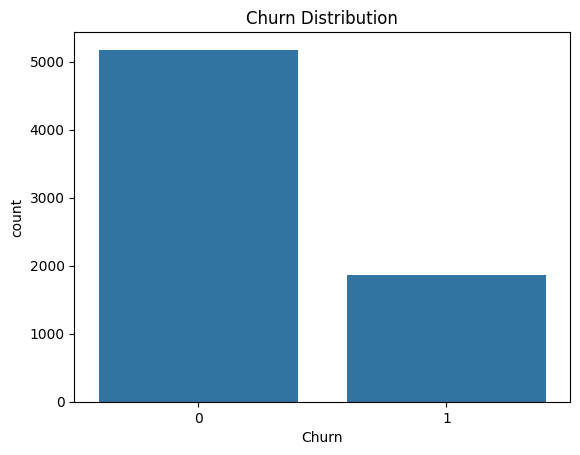

In [ ]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


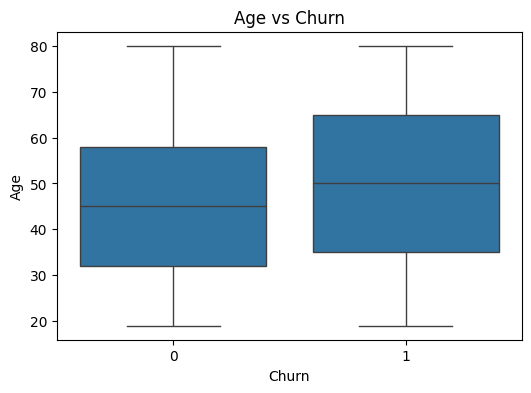

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Age', data=df)
plt.title("Age vs Churn")
plt.show()


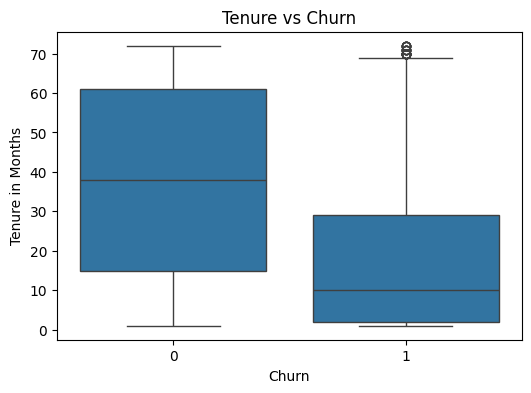

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Tenure in Months', data=df)
plt.title("Tenure vs Churn")
plt.show()


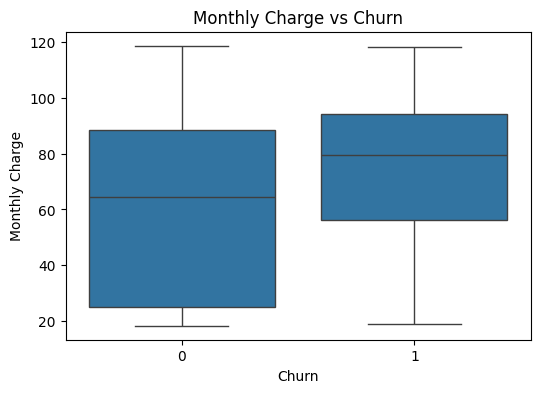

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Monthly Charge', data=df)
plt.title("Monthly Charge vs Churn")
plt.show()


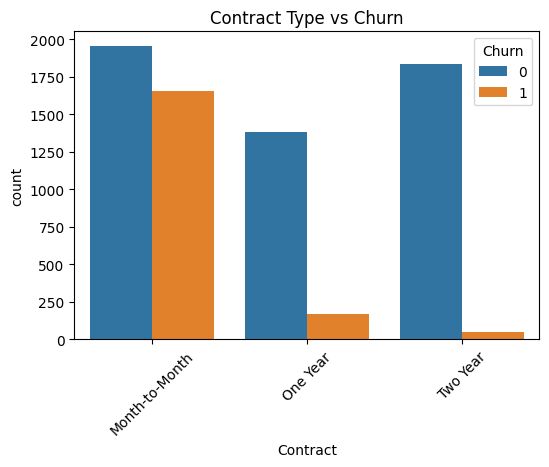

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Contract Type vs Churn")
plt.xticks(rotation=45)
plt.show()


Insight: Customers with month-to-month contracts are significantly more likely to churn compared to those with one-year or two-year contracts.

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [ ]:
cat_cols = X.select_dtypes(include='object').columns
num_cols = X.select_dtypes(exclude='object').columns

print("Categorical columns:", len(cat_cols))
print("Numerical columns:", len(num_cols))


Categorical columns: 26
Numerical columns: 18


In [ ]:
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
X_train.shape, X_test.shape


((5634, 1151), (1409, 1151))

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9609652235628106

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97      1035
           1       0.95      0.90      0.92       374

    accuracy                           0.96      1409
   macro avg       0.96      0.94      0.95      1409
weighted avg       0.96      0.96      0.96      1409



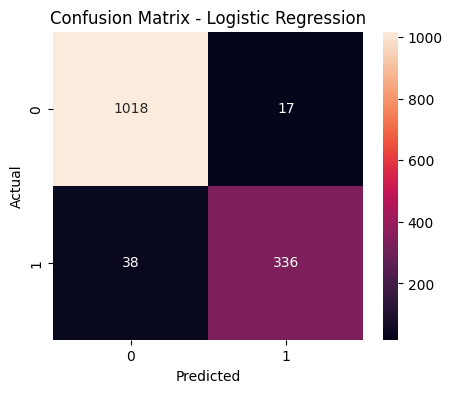

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
rf_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


Accuracy: 0.9439318665720369
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      1035
           1       0.96      0.82      0.89       374

    accuracy                           0.94      1409
   macro avg       0.95      0.91      0.92      1409
weighted avg       0.94      0.94      0.94      1409



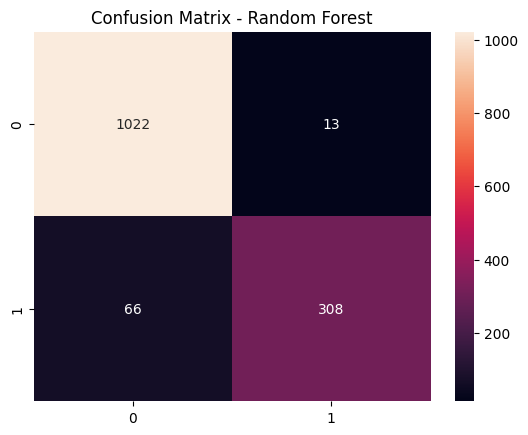

In [ ]:
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, fmt='d')
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [ ]:
import joblib

joblib.dump(model, "churn_model.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(X.columns.tolist(), "feature_columns.pkl")


['feature_columns.pkl']

In [ ]:
# During training
feature_columns = X_train.columns.tolist()
joblib.dump(feature_columns, "feature_columns.pkl")


['feature_columns.pkl']

In [ ]:
# Save all feature columns (numeric + one-hot)
feature_columns = X_train.columns.tolist()   # X_train after preprocessing
joblib.dump(feature_columns, "feature_columns.pkl")


['feature_columns.pkl']

In [ ]:
import joblib

feature_columns = joblib.load("feature_columns.pkl")
print(len(feature_columns))       # Must print 1151 (or however many features your model has)
print(feature_columns[:20])       # First 20 columns, check if one-hot columns are included


1151
['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'Gender_Male', 'Under 30_Yes']


In [ ]:
# TRAINING SCRIPT EXAMPLE
feature_columns = X_train.columns.tolist()  # X_train is AFTER one-hot encoding
joblib.dump(feature_columns, "feature_columns.pkl")


['feature_columns.pkl']

In [ ]:
print(feature_columns[:20])  

['Age', 'Number of Dependents', 'Zip Code', 'Latitude', 'Longitude', 'Population', 'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges', 'Avg Monthly GB Download', 'Monthly Charge', 'Total Charges', 'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges', 'Total Revenue', 'Satisfaction Score', 'CLTV', 'Gender_Male', 'Under 30_Yes']
